In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/My Drive/Cogni_AI")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score , accuracy_score
from sklearn.metrics import roc_auc_score,classification_report,accuracy_score

In [ ]:
raw_train = pd.read_csv('Building_Strength_Train.csv', delimiter=',')
raw_test = pd.read_csv('Building_Strength_Test.csv', delimiter=',')

In [ ]:
raw_train.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,284.655270,73.317973,51.687838,178.920811,6.155135,980.638514,781.890541,48.581081,36.963635
std,100.857751,87.155086,62.401024,22.721371,6.291590,70.901898,82.042658,67.264973,17.686493
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,3.000000,2.330000
25%,203.500000,0.000000,0.000000,160.675000,0.000000,936.200000,746.600000,7.000000,23.610000
50%,254.000000,24.000000,0.000000,181.100000,5.800000,969.500000,781.200000,28.000000,36.055000
75%,362.600000,133.000000,118.300000,192.000000,10.400000,1040.600000,845.000000,56.000000,49.200000
max,540.000000,359.400000,174.700000,228.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
raw_test.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,0.0
mean,272.268966,75.370345,60.568966,188.320345,6.331034,953.220690,752.375517,38.213793,NaN
std,112.981328,84.133608,67.592635,15.485469,5.081550,90.162607,71.049889,50.605494,NaN
min,132.000000,0.000000,0.000000,127.000000,0.000000,801.000000,612.000000,1.000000,NaN
25%,154.850000,0.000000,0.000000,178.500000,0.000000,878.050000,697.775000,28.000000,NaN
50%,287.650000,0.000000,0.000000,189.000000,7.000000,950.200000,763.500000,28.000000,NaN
75%,330.875000,145.000000,113.150000,196.000000,10.000000,1002.000000,805.825000,28.000000,NaN
max,540.000000,260.000000,200.100000,247.000000,22.100000,1125.000000,896.000000,360.000000,NaN


In [ ]:
raw_test.drop(['csMPa'], axis=1, inplace=True)

In [ ]:
df = raw_train.copy()
df_test = raw_test.copy()

In [ ]:
df.shape

(740, 9)

In [ ]:
df.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [ ]:
df_test.isnull().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
dtype: int64

In [ ]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df.dtypes

cement              float64
slag                float64
flyash              float64
water               float64
superplasticizer    float64
coarseaggregate     float64
fineaggregate       float64
age                   int64
csMPa               float64
dtype: object

In [ ]:
duplicate_rows= df[df.duplicated(keep='first')]
duplicate_rows.head(5)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
77,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.4
80,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.4
86,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.3
88,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.3
91,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.3


In [ ]:
duplicate_rows.shape

(24, 9)

In [ ]:
#Dropping duplicate rows
df.drop_duplicates(keep='first', inplace=True)
df.shape

(716, 9)

In [ ]:
duplicate_rows= df_test[df_test.duplicated(keep='first')]
duplicate_rows.head(5)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
69,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28


In [ ]:
df_test.shape

(290, 8)

In [ ]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

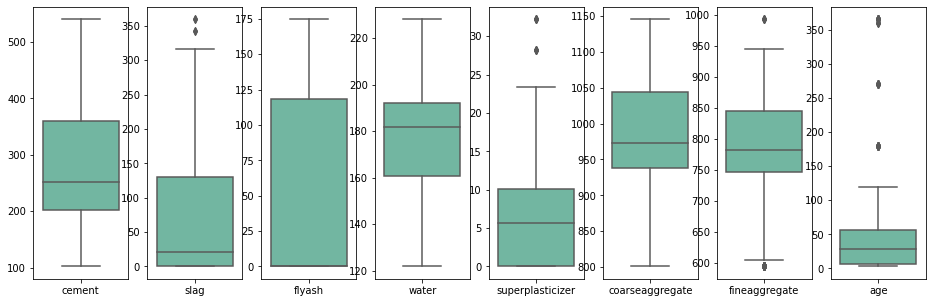

In [ ]:
fig, (axes) = plt.subplots(nrows=1, ncols=8, figsize=(16, 5))

sns.boxplot(data=df[['cement']], palette='Set2',ax=axes[0])
sns.boxplot(data=df[['slag']], palette='Set2',ax=axes[1])
sns.boxplot(data=df[['flyash']], palette='Set2',ax=axes[2])
sns.boxplot(data=df[['water']], palette='Set2',ax=axes[3])  
sns.boxplot(data=df[['superplasticizer']], palette='Set2',ax=axes[4])
sns.boxplot(data=df[['coarseaggregate']], palette='Set2',ax=axes[5])
sns.boxplot(data=df[['fineaggregate']], palette='Set2',ax=axes[6])
sns.boxplot(data=df[['age']], palette='Set2',ax=axes[7])
  

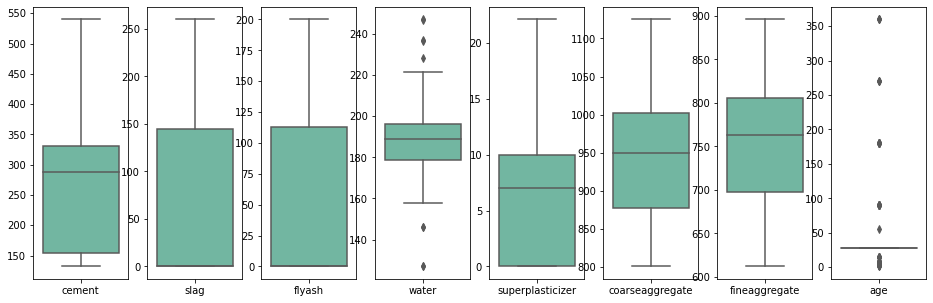

In [ ]:
fig, (axes) = plt.subplots(nrows=1, ncols=8, figsize=(16, 5))

sns.boxplot(data=df_test[['cement']], palette='Set2',ax=axes[0])
sns.boxplot(data=df_test[['slag']], palette='Set2',ax=axes[1])
sns.boxplot(data=df_test[['flyash']], palette='Set2',ax=axes[2])
sns.boxplot(data=df_test[['water']], palette='Set2',ax=axes[3])  
sns.boxplot(data=df_test[['superplasticizer']], palette='Set2',ax=axes[4])
sns.boxplot(data=df_test[['coarseaggregate']], palette='Set2',ax=axes[5])
sns.boxplot(data=df_test[['fineaggregate']], palette='Set2',ax=axes[6])
sns.boxplot(data=df_test[['age']], palette='Set2',ax=axes[7])

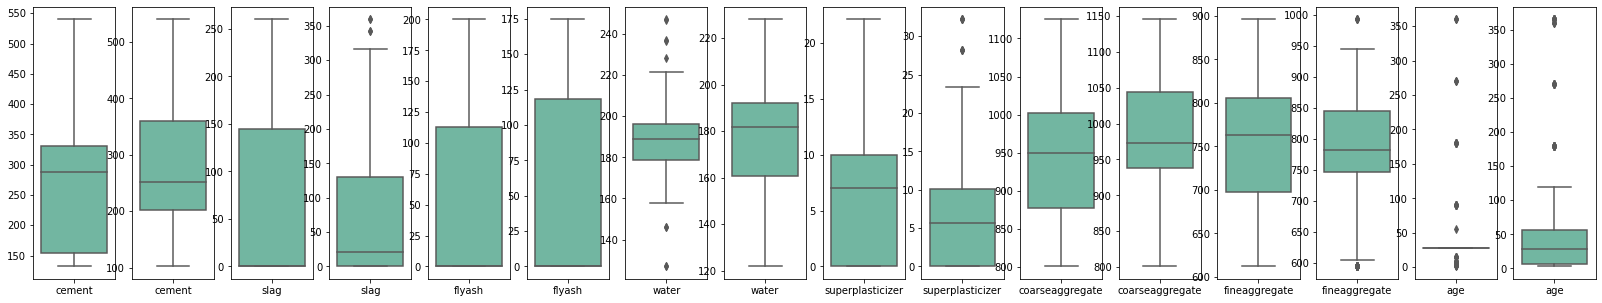

In [ ]:
fig, (axes) = plt.subplots(nrows=1, ncols=16, figsize=(28, 5))

sns.boxplot(data=df_test[['cement']], palette='Set2',ax=axes[0])
sns.boxplot(data=df[['cement']], palette='Set2',ax=axes[1])  
sns.boxplot(data=df_test[['slag']], palette='Set2',ax=axes[2])
sns.boxplot(data=df[['slag']], palette='Set2',ax=axes[3])
sns.boxplot(data=df_test[['flyash']], palette='Set2',ax=axes[4])
sns.boxplot(data=df[['flyash']], palette='Set2',ax=axes[5])
sns.boxplot(data=df_test[['water']], palette='Set2',ax=axes[6])
sns.boxplot(data=df[['water']], palette='Set2',ax=axes[7])  
sns.boxplot(data=df_test[['superplasticizer']], palette='Set2',ax=axes[8])
sns.boxplot(data=df[['superplasticizer']], palette='Set2',ax=axes[9])
sns.boxplot(data=df_test[['coarseaggregate']], palette='Set2',ax=axes[10])
sns.boxplot(data=df[['coarseaggregate']], palette='Set2',ax=axes[11])
sns.boxplot(data=df_test[['fineaggregate']], palette='Set2',ax=axes[12])
sns.boxplot(data=df[['fineaggregate']], palette='Set2',ax=axes[13])
sns.boxplot(data=df_test[['age']], palette='Set2',ax=axes[14])
sns.boxplot(data=df[['age']], palette='Set2',ax=axes[15])

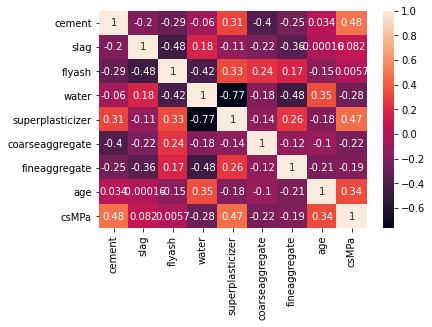

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
unscaled_df = df.copy()
unscaled_df_test = df_test.copy()

In [ ]:
df=unscaled_df.copy()
df_test=unscaled_df_test.copy()

In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler, RobustScaler

robust_scaler = RobustScaler()
df= df.loc[:,['cement', 'slag', 'flyash', 'water','superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age']]
df = pd.DataFrame(robust_scaler.fit_transform(df),
                   columns=['cement', 'slag', 'flyash', 'water','superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age'],
                   index = df.index)

In [ ]:
df['csMPa']=unscaled_df['csMPa']
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,1.835669,-0.160889,0.0,-0.629393,-0.316832,0.630682,-1.069106,0.000000,79.99
1,1.835669,-0.160889,0.0,-0.629393,-0.316832,0.772727,-1.069106,0.000000,61.89
2,0.514013,0.930856,0.0,1.479233,-0.564356,-0.392045,-1.902439,4.938776,40.27
3,0.514013,0.930856,0.0,1.479233,-0.564356,-0.392045,-1.902439,6.877551,41.05
4,-0.338854,0.853476,0.0,0.329073,-0.564356,0.047348,0.450203,6.775510,44.30


In [ ]:
#  scaling
df_test= df_test.loc[:,['cement', 'slag', 'flyash', 'water','superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age']]
df_test = pd.DataFrame(robust_scaler.fit_transform(df_test),
                   columns=['cement', 'slag', 'flyash', 'water','superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age'],
                   index = df_test.index)

In [ ]:
x_train = df.drop(['csMPa'],axis=1)
y_train = df['csMPa']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train, test_size=0.2,random_state=31)

KeyError: ignored

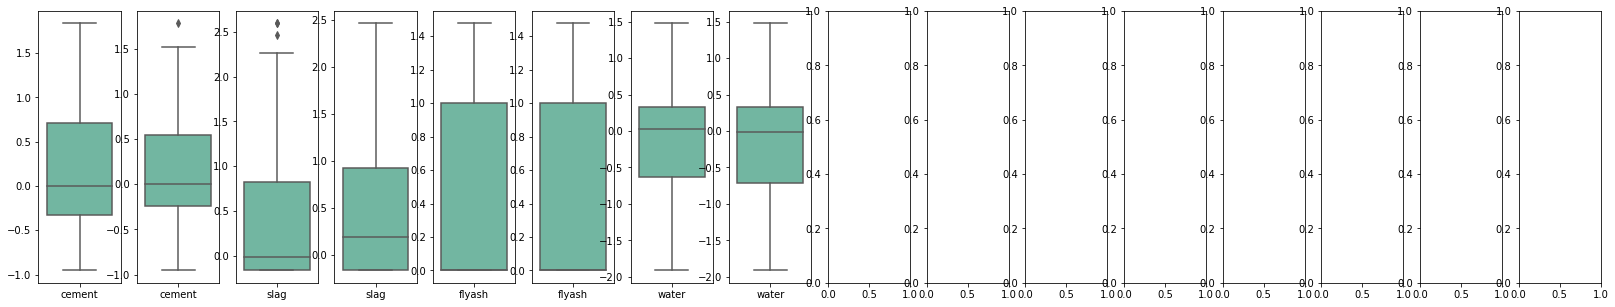

In [ ]:
fig, (axes) = plt.subplots(nrows=1, ncols=16, figsize=(28, 5))

sns.boxplot(data=x_train[['cement']], palette='Set2',ax=axes[0])
sns.boxplot(data=x_valid[['cement']], palette='Set2',ax=axes[1])  
sns.boxplot(data=x_train[['slag']], palette='Set2',ax=axes[2])
sns.boxplot(data=x_valid[['slag']], palette='Set2',ax=axes[3])
sns.boxplot(data=x_train[['flyash']], palette='Set2',ax=axes[4])
sns.boxplot(data=x_valid[['flyash']], palette='Set2',ax=axes[5])
sns.boxplot(data=x_train[['water']], palette='Set2',ax=axes[6])
sns.boxplot(data=x_valid[['water']], palette='Set2',ax=axes[7])  
sns.boxplot(data=x_train[['superplasticizer']], palette='Set2',ax=axes[8])
sns.boxplot(data=x_valid[['superplasticizer']], palette='Set2',ax=axes[9])
sns.boxplot(data=x_train[['coarseaggregate']], palette='Set2',ax=axes[10])
sns.boxplot(data=x_valid[['coarseaggregate']], palette='Set2',ax=axes[11])
sns.boxplot(data=x_train[['fineaggregate']], palette='Set2',ax=axes[12])
sns.boxplot(data=x_valid[['fineaggregate']], palette='Set2',ax=axes[13])
sns.boxplot(data=x_train[['age']], palette='Set2',ax=axes[14])
sns.boxplot(data=x_valid[['age']], palette='Set2',ax=axes[15])

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_valid)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
  
MSE = mean_squared_error(y_valid, y_pred)
print(MSE)

22.626264856946904


In [ ]:
  
R2 = metrics.r2_score(y_valid, y_pred)
print(R2)

0.8084079277584393


KNN


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)

In [ ]:
knn_reg.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [ ]:
2y_pred = knn_reg.predict(x_valid)

SyntaxError: ignored

In [ ]:
R2 = metrics.r2_score(y_valid, y_pred)
MSE = mean_squared_error(y_valid, y_pred)
print("MSE:{}".format(MSE))
print("Re score: {}".format(R2))

MSE:52.35015227623455
Re score: 0.8084079277584393


NN

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.layers import Dropout

In [ ]:
nn_reg = Sequential()  
nn_reg.add(Dense(units = 16, kernel_initializer = 'uniform', 
                     activation = 'relu', input_dim = 8))  
#nn_reg.add(Dropout(0.1))
nn_reg.add(Dense(units = 32, kernel_initializer = 'uniform', 
                     activation = 'relu'))
#nn_reg.add(Dropout(0.1))
nn_reg.add(Dense(units = 32, kernel_initializer = 'uniform', 
                     activation = 'relu'))
nn_reg.add(Dense(units = 1, kernel_initializer = 'uniform', 
                     activation = 'linear'))   


In [ ]:
nn_reg.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
nn_reg.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 16)                144       
_________________________________________________________________
dense_41 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_42 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 33        
Total params: 1,777
Trainable params: 1,777
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn_reg.fit(x_train, y_train, batch_size = 32, epochs = 100)  

Epoch 1/100
18/18 [==============================] - 1s 2ms/step - loss: 1641.3289 - mean_squared_error: 1641.3289
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 1578.0170 - mean_squared_error: 1578.0170
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 1594.9982 - mean_squared_error: 1594.9982
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 1544.4696 - mean_squared_error: 1544.4696
Epoch 5/100
18/18 [==============================] - 0s 1ms/step - loss: 1324.5998 - mean_squared_error: 1324.5998
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 822.6018 - mean_squared_error: 822.6018
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 354.4767 - mean_squared_error: 354.4767
Epoch 8/100
18/18 [==============================] - 0s 1ms/step - loss: 148.6681 - mean_squared_error: 148.6681
Epoch 9/100
18/18 [==============================] - 0s 1ms/step - loss: 155.0911 - me

In [ ]:
y_pred = nn_reg.predict(x_valid)                     


In [ ]:
R2 = metrics.r2_score(y_valid, y_pred)
MSE = mean_squared_error(y_valid, y_pred)
MAE = mean_absolute_error(y_valid, y_pred)
print("MSE:{}".format(MSE))
print("MAE: {}".format(MAE))
print("Re score: {}".format(R2))

MSE:133.66375129092606
MAE: 9.140472055806054
Re score: 0.5108148882112267


rf

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)
y_pred = rf_reg.predict(x_valid)   

In [ ]:
R2 = metrics.r2_score(y_valid, y_pred)
MSE = mean_squared_error(y_valid, y_pred)
print("MSE:{}".format(MSE))
print("Re score: {}".format(R2))

MSE:32.09116815743684
Re score: 0.8825521389987071


xgboost


In [ ]:
from xgboost import XGBRegressor
xgb_reg = XGBRegressor()
xgb_reg.fit(x_train,y_train)
y_pred = xgb_reg.predict(x_valid)  

[14:36:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
R2 = metrics.r2_score(y_valid, y_pred)
MSE = mean_squared_error(y_valid, y_pred)
MAE = mean_absolute_error(y_valid, y_pred)
print("MSE:{}".format(MSE))
print("MAE: {}".format(MAE))
print("Re score: {}".format(R2))

MSE:22.626264856946904
MAE: 3.631247185336219
Re score: 0.9171919701750929


Training on whole dataset

In [ ]:
X_train = df.drop(['csMPa'],axis=1)
Y_train = df['csMPa']

In [ ]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train,Y_train)
Y_pred = xgb_reg.predict(df_test) 

[14:37:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
Y_pred= pd.DataFrame(Y_pred, columns=['csMPa'], index=df_test.index)
output_df= df_test.join(Y_pred)

In [ ]:
output_df.to_csv('output_xgb.csv', index=None)

In [ ]:
output_final= raw_test.join(Y_pred)
output_final.to_csv('Submission_Building_Stregth_Test_874384.csv', index=None)